# Linear Regression Assignment

## Problem Statement
A bike-sharing system offers short-term bike rentals for a fee or free, from computer-controlled docks where users unlock bikes, returning them to any system dock. BoomBikes, a US provider, faced revenue drops due to COVID-19 and plans a new strategy to boost revenue post-lockdown. They aim to understand bike demand after COVID-19 to meet future needs and outshine competitors. BoomBikes hired a consulting firm to identify key demand factors using meteorological surveys and daily bike usage data. BoomBikes hired a consulting firm to identify factors affecting shared bike demand in the US. 

They aim to find:
        
1. Significant variables predicting bike demand        .
2. How well these variables describe dema
        

Using meteorological surveys and lifestyle data, they have collected a large dataset on daily bike demands across the American market.



## Assignment Solution
- The solution can be divided into follow sections:

    1. Reading and Understanding the Data.
    2. Data Visualisation.
    3. Data Preparation.
    4. Splitting the Data into Training and Testing Sets.
    5. Building a linear model.
    6. Residual Analysis, Predictions and Model Evaluation.

##  1. Reading and Understanding the Data.
 - Let's start with Importing the basic libraries and understanding the structure of the data.

In [1]:
# Importing the libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
# let's Read the given .CSV file for the given dataset.
b_day = pd.read_csv('day.csv')
b_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Let's check the shape of the dataset.
b_day.shape

(730, 16)

In [4]:
# Let's check the columns name in the dataset.
b_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# Let's check the datatype of each columns.
b_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Let's check for the missing values in the dataset.
b_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There is no missing values in the dataset, so we can skip the missing value treatment for the given dataset.

In [7]:
# Mapping variables season, month, weathersit, weekday

b_day['season']=b_day.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
b_day['mnth'] = b_day.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
b_day['weathersit'] = b_day.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
b_day['weekday'] = b_day.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
b_day['holiday'] = b_day.holiday.map({0:'No', 1:'Yes'})
b_day['workingday'] = b_day.workingday.map({0:'Non workingday', 1:'workingday'})
b_day['yr'] = b_day.yr.map({0:'2018', 1:'2019'})

b_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,No,Mon,workingday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,No,Tue,workingday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,No,Wed,workingday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,No,Thu,workingday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,No,Fri,workingday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- This code maps numeric codes in the DataFrame to readable names for season, mnth, weathersit, and weekday. Converting numerical data into more understandable labels.

In [8]:
# Let's convert the datatype for the column dteday.

b_day['dteday'] = pd.to_datetime(b_day['dteday'], format='%d-%m-%Y', errors='raise')
b_day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,No,Mon,workingday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,Jan,No,Tue,workingday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,Jan,No,Wed,workingday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,Jan,No,Thu,workingday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,2018,Jan,No,Fri,workingday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-01-06,spring,2018,Jan,No,Sat,Non workingday,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-01-07,spring,2018,Jan,No,Sun,Non workingday,Mist + Cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2018-01-08,spring,2018,Jan,No,Mon,workingday,Mist + Cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2018-01-09,spring,2018,Jan,No,Tue,workingday,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2018-01-10,spring,2018,Jan,No,Wed,workingday,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [9]:
# Here, the Instant column is useless because it is just serial number, so It is better to drop that column.
b_day.drop(columns=['instant'], inplace=True)
b_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,2018,Jan,No,Mon,workingday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,spring,2018,Jan,No,Tue,workingday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,spring,2018,Jan,No,Wed,workingday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,spring,2018,Jan,No,Thu,workingday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,spring,2018,Jan,No,Fri,workingday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 2. Data Visualisation. 
- Let's Visulise the data for better understanding.

In [10]:
# let's check the datatypes for each columns.
b_day.dtypes

dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [11]:
# let's Identify Numeric and Categorical Variables.
b_day.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
dteday        730
dtype: int64

- So looking at the above output we can conclude that temp, hum, casual, windspeed, registered, atemp, cnt are Numeric variables and rest are the Categorical Variables.

In [12]:
# let's convert the int datatype to float datatype. 
b_day_dtype = b_day.copy()
for col in b_day_dtype.select_dtypes(include=['int']).columns:
    b_day_dtype[col] = b_day_dtype[col].astype(float)

b_day_dtype.dtypes

dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
cnt                  float64
dtype: object

In [13]:
# Let's save correlation values of numeric variables in new variable.
b_day_numeric = b_day_dtype.select_dtypes(include=[float])
cor = b_day_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


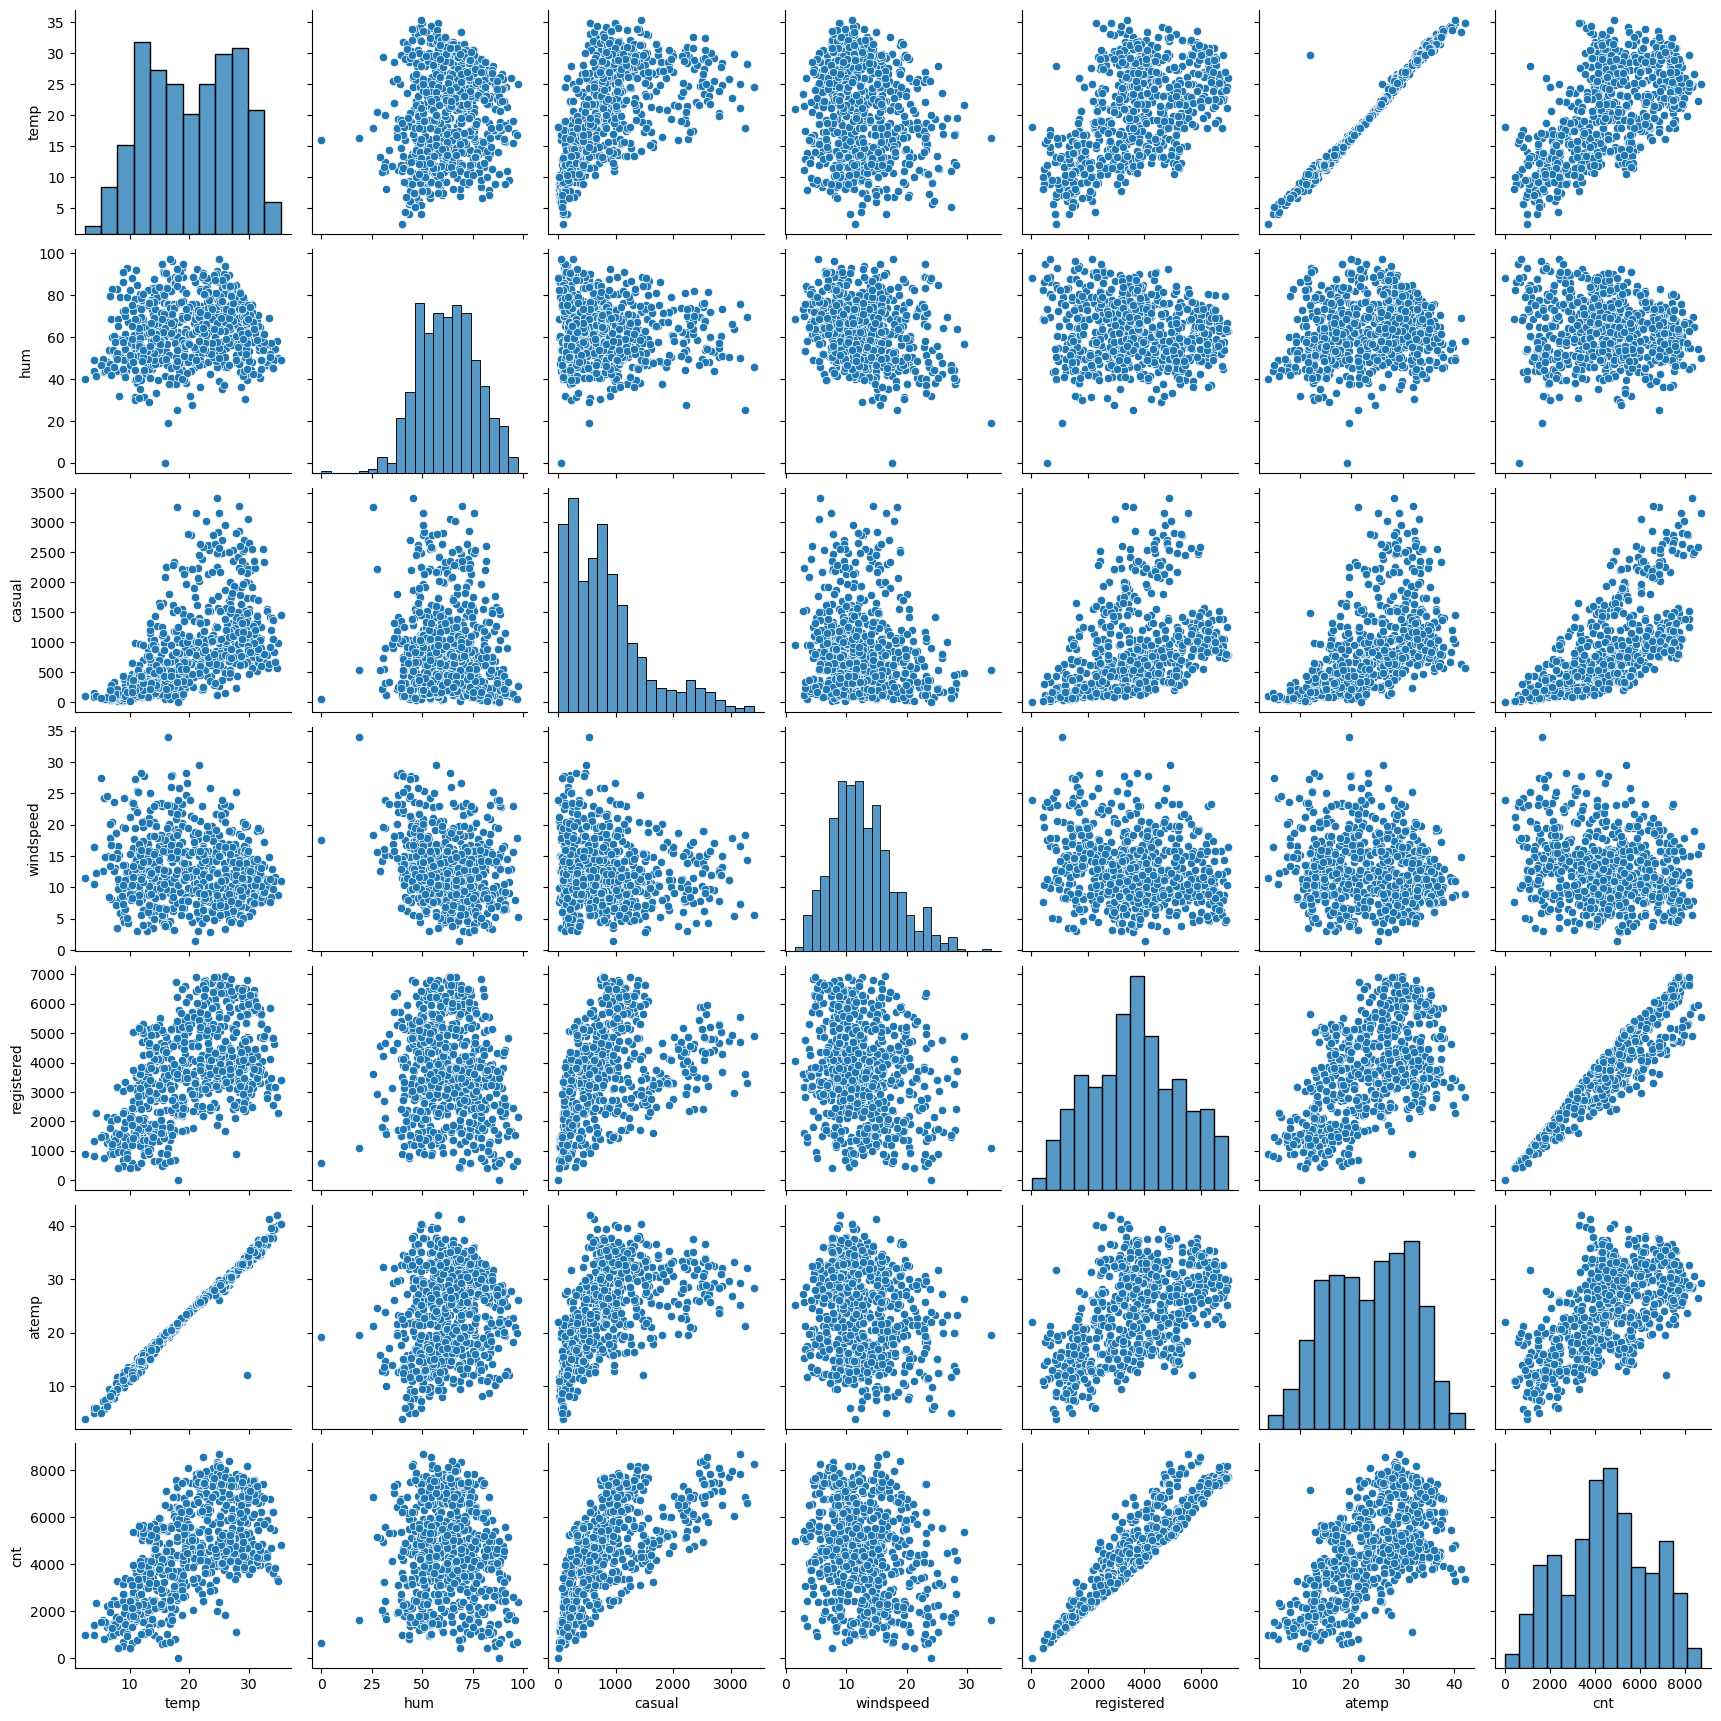

In [14]:
# let's Visulise for Numeric Variables.
sns.pairplot(b_day, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt'])
plt.show()

- Some independent variables are positively correlated with the 'count' variable. Bike rentals show a strong correlation with temperature.

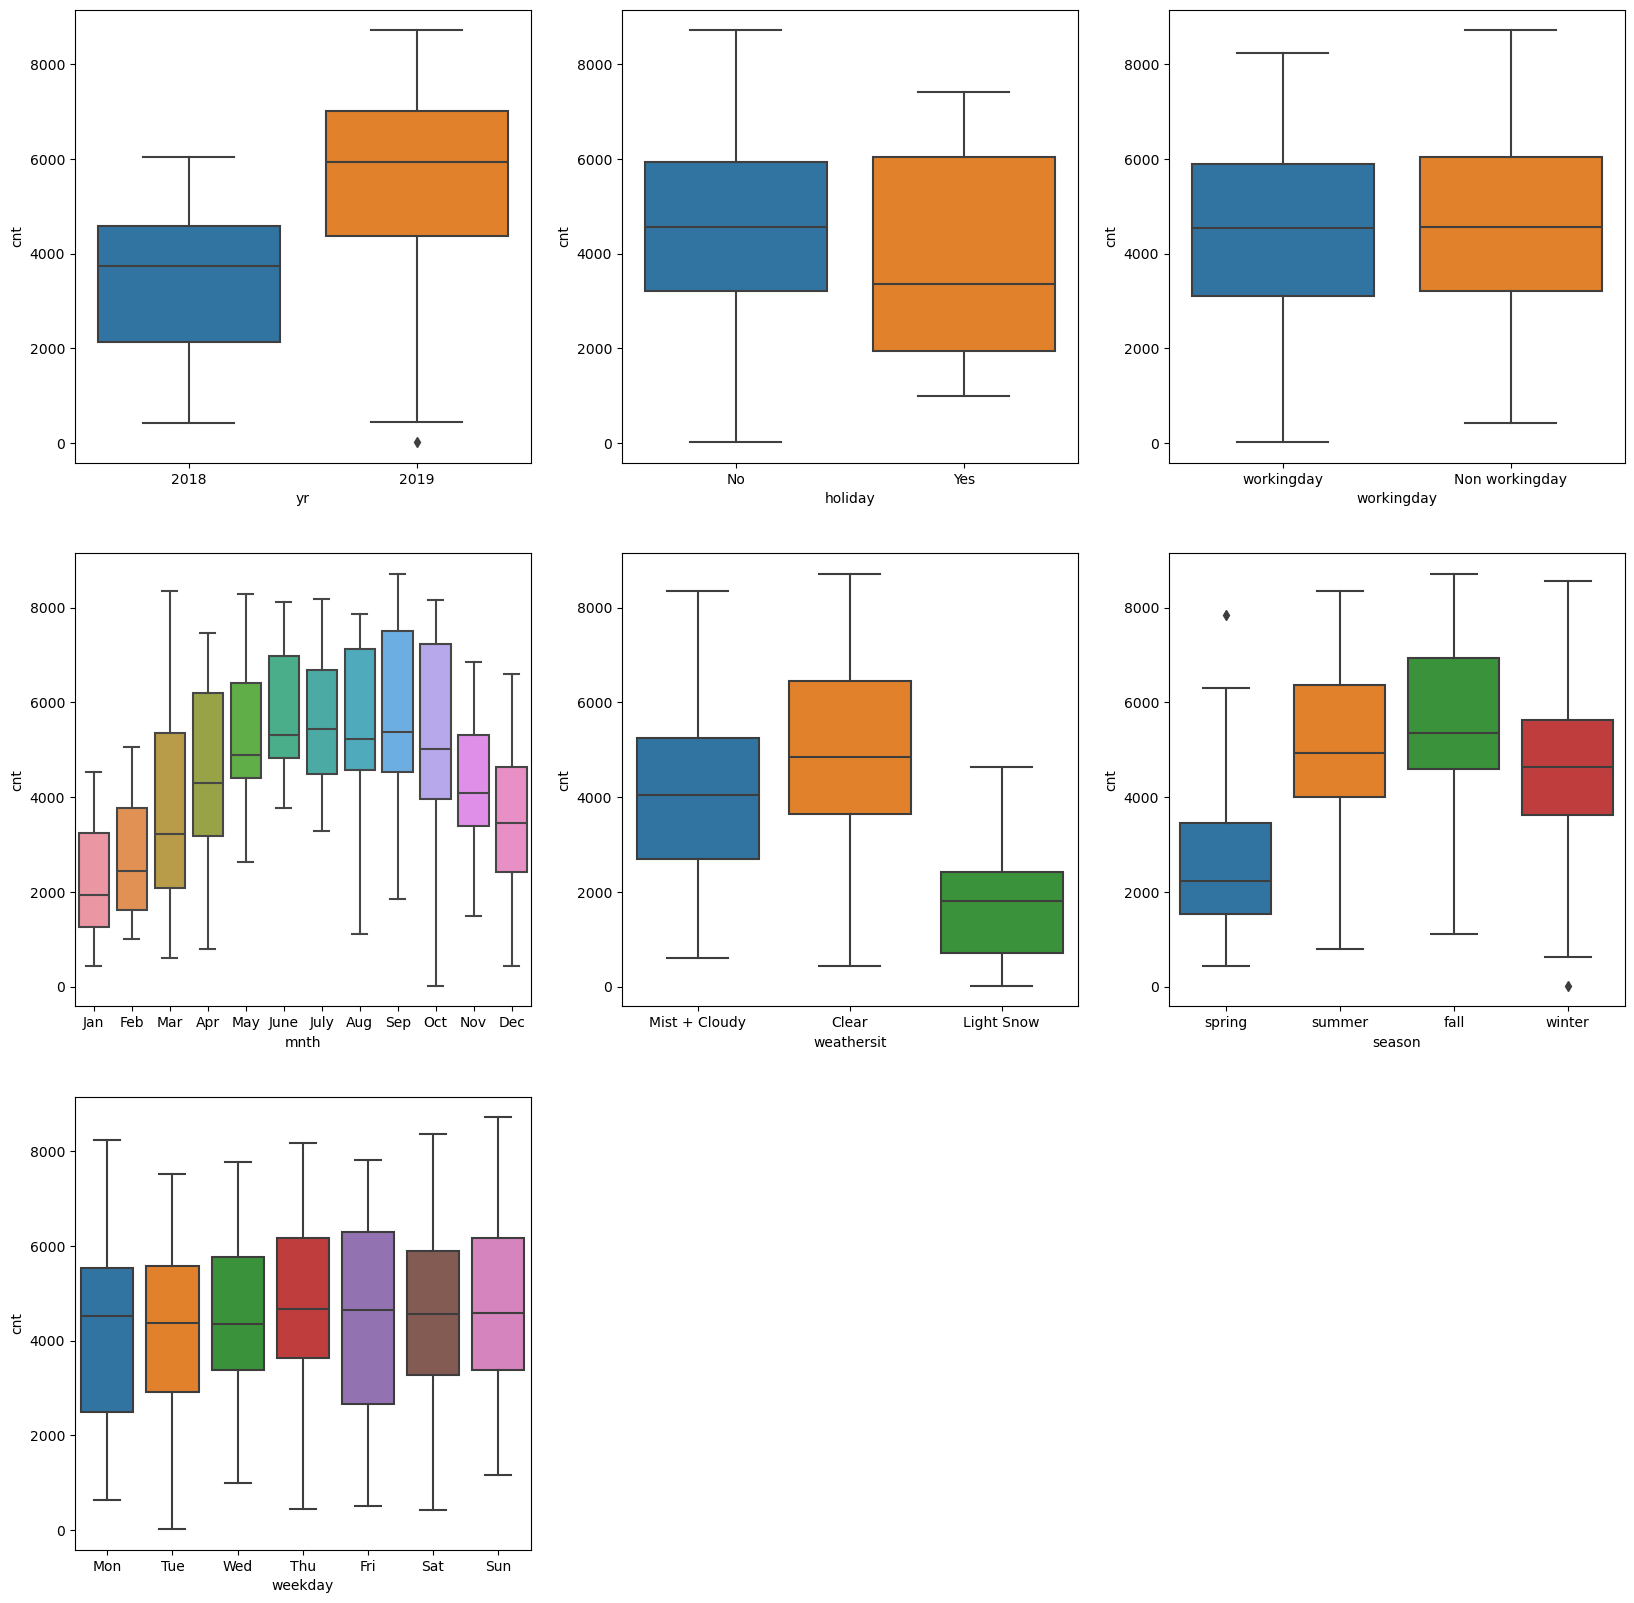

In [15]:
# let's Visulise for Categorical Variables.

plt.figure(figsize=(20, 20))

plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = b_day)

plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = b_day)

plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = b_day)

plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = b_day)

plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = b_day)

plt.subplot(3,3,6)
sns.boxplot(x = 'season', y = 'cnt', data = b_day)

plt.subplot(3,3,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = b_day)


plt.show()

- Insights reveal the relationship between categorical variables and the target variable:
     - Bike rentals are higher in the fall, followed by summer.
     - Rentals increased in 2019 compared to 2018.
     - Rentals are higher in partly cloudy weather.
     - Rentals peak on Saturdays, Wednesdays, and Thursdays.days.

## Univariate Analysis.
- Let's have Univariate Analysis on some variables like season, year and month for better understanding.

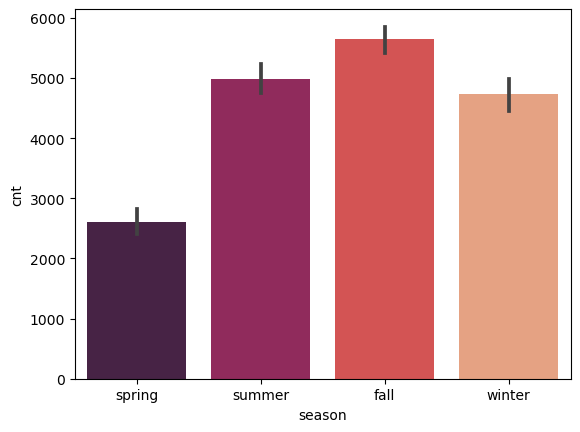

In [16]:
# Season.
sns.barplot(x='season', y='cnt', data=b_day, palette="rocket")
plt.show()


- Bike rentals are highest during the fall season, followed by summer.

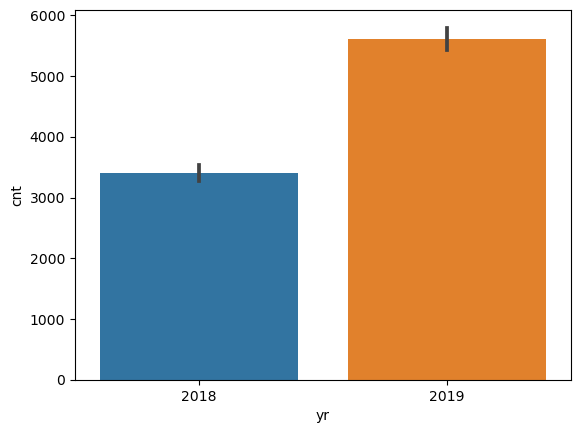

In [17]:
# Year.
sns.barplot(x='yr',y='cnt',data=b_day)
plt.show()

- Bike rentals increased in 2019 compared to 2018

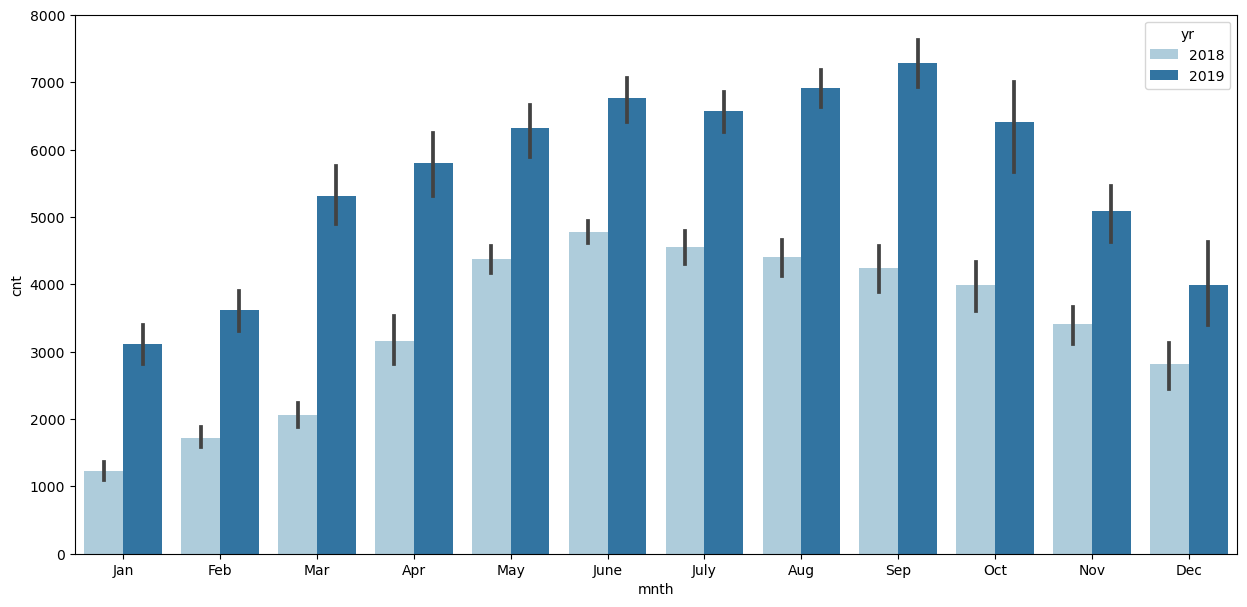

In [18]:
# Month.
plt.figure(figsize=(15,7))
sns.barplot(x='mnth',y='cnt',hue='yr',data=b_day,palette='Paired')
plt.show()

- Bike rentals is more in the month of june for the year 2018, whereas it increased in the month of september for the year 2019. On the otherhand, Bike rentals is less in the month of jan for both years.

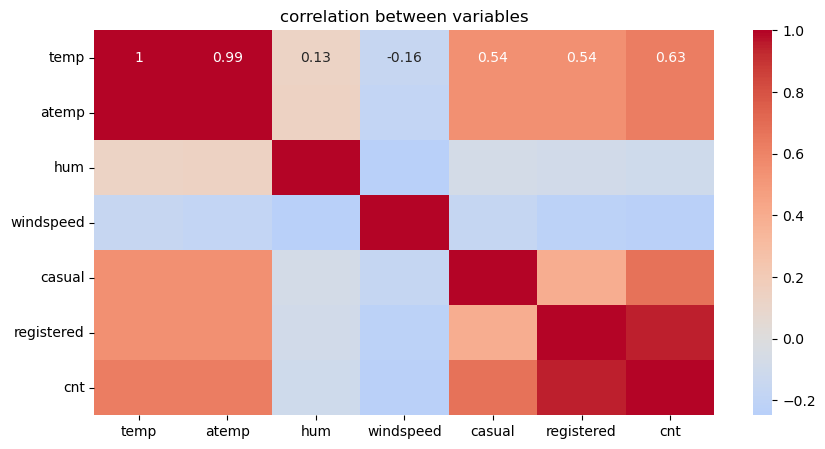

In [19]:
# Let's check the correlation between variables.

plt.figure(figsize=(10, 5))
sns.heatmap(cor, annot=True, cmap='coolwarm', center=0)
plt.title("correlation between variables")
plt.show()

- The heatmap reveals several valuable insights:
    - Correlation of Count ('cnt') with Independent Variables:
        - High Positive Correlations:
            - Count ('cnt') is highly correlated with 'casual' and 'registered', which is expected as these variables together represent the count.
            - There is also a high positive correlation with 'atemp'.
        - Negative Correlation: 
            - Count ('cnt') is negatively correlated with 'windspeed' (approximately -0.24). This suggests that the demand for shared bikes decreases  on windy days compared to normal days.
    - Correlation Among Independent Variables:
        - Some independent variables show high correlations, especially in the top-left part of the matrix:
            - 'atemp' and 'temp' are highly (positively) correlated, with a correlation almost equal to 1.


In [20]:
# Here, we can observe that some of the columns are not required, so let's drop them.
b_day.drop(columns=['dteday', 'casual', 'registered', 'atemp' ], inplace=True)
b_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,No,Mon,workingday,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,No,Tue,workingday,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,No,Wed,workingday,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,No,Thu,workingday,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,No,Fri,workingday,Clear,9.305237,43.6957,12.522300,1600


**Now we can procced for data preparation**

## 3. Data Preparation.

In [21]:
# Let's Select the catergorical values.
b_day_cat = b_day_dtype
b_day_cat = b_day_cat.drop(columns= b_day_cat.select_dtypes(include=[float]).columns)
b_day_cat.drop(columns=['dteday'], inplace=True)
b_day_cat.dtypes

season        object
yr            object
mnth          object
holiday       object
weekday       object
workingday    object
weathersit    object
dtype: object

**Creating dummy variables**

We need to convert the categorical levels of the variables 'season', 'mnth', 'weekday', and 'weathersit' into integer values. For this, we will use something called dummy variables.

In [22]:
#Let's create dummies.
b_day_dummies = pd.get_dummies(b_day_cat,
                                columns=[
                                    'season', 'yr', 'mnth', 'holiday',
                                    'weekday', 'workingday', 'weathersit'
                                ],
                                drop_first=True,
                                dtype="int")
b_day_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Snow,weathersit_Mist + Cloudy
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
# Let's merge the dummies with main dataset.
b_day=pd.concat([b_day_dummies,b_day],axis=1)
b_day.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Snow,weathersit_Mist + Cloudy,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,spring,2018,Jan,No,Mon,workingday,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,spring,2018,Jan,No,Tue,workingday,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,spring,2018,Jan,No,Wed,workingday,Clear,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,spring,2018,Jan,No,Thu,workingday,Clear,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,spring,2018,Jan,No,Fri,workingday,Clear,9.305237,43.6957,12.522300,1600


In [24]:
#let's drop the catergorical columns.
b_day.drop(columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], inplace=True)
b_day.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Snow,weathersit_Mist + Cloudy,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9.305237,43.6957,12.522300,1600


In [25]:
b_day.shape

(730, 29)

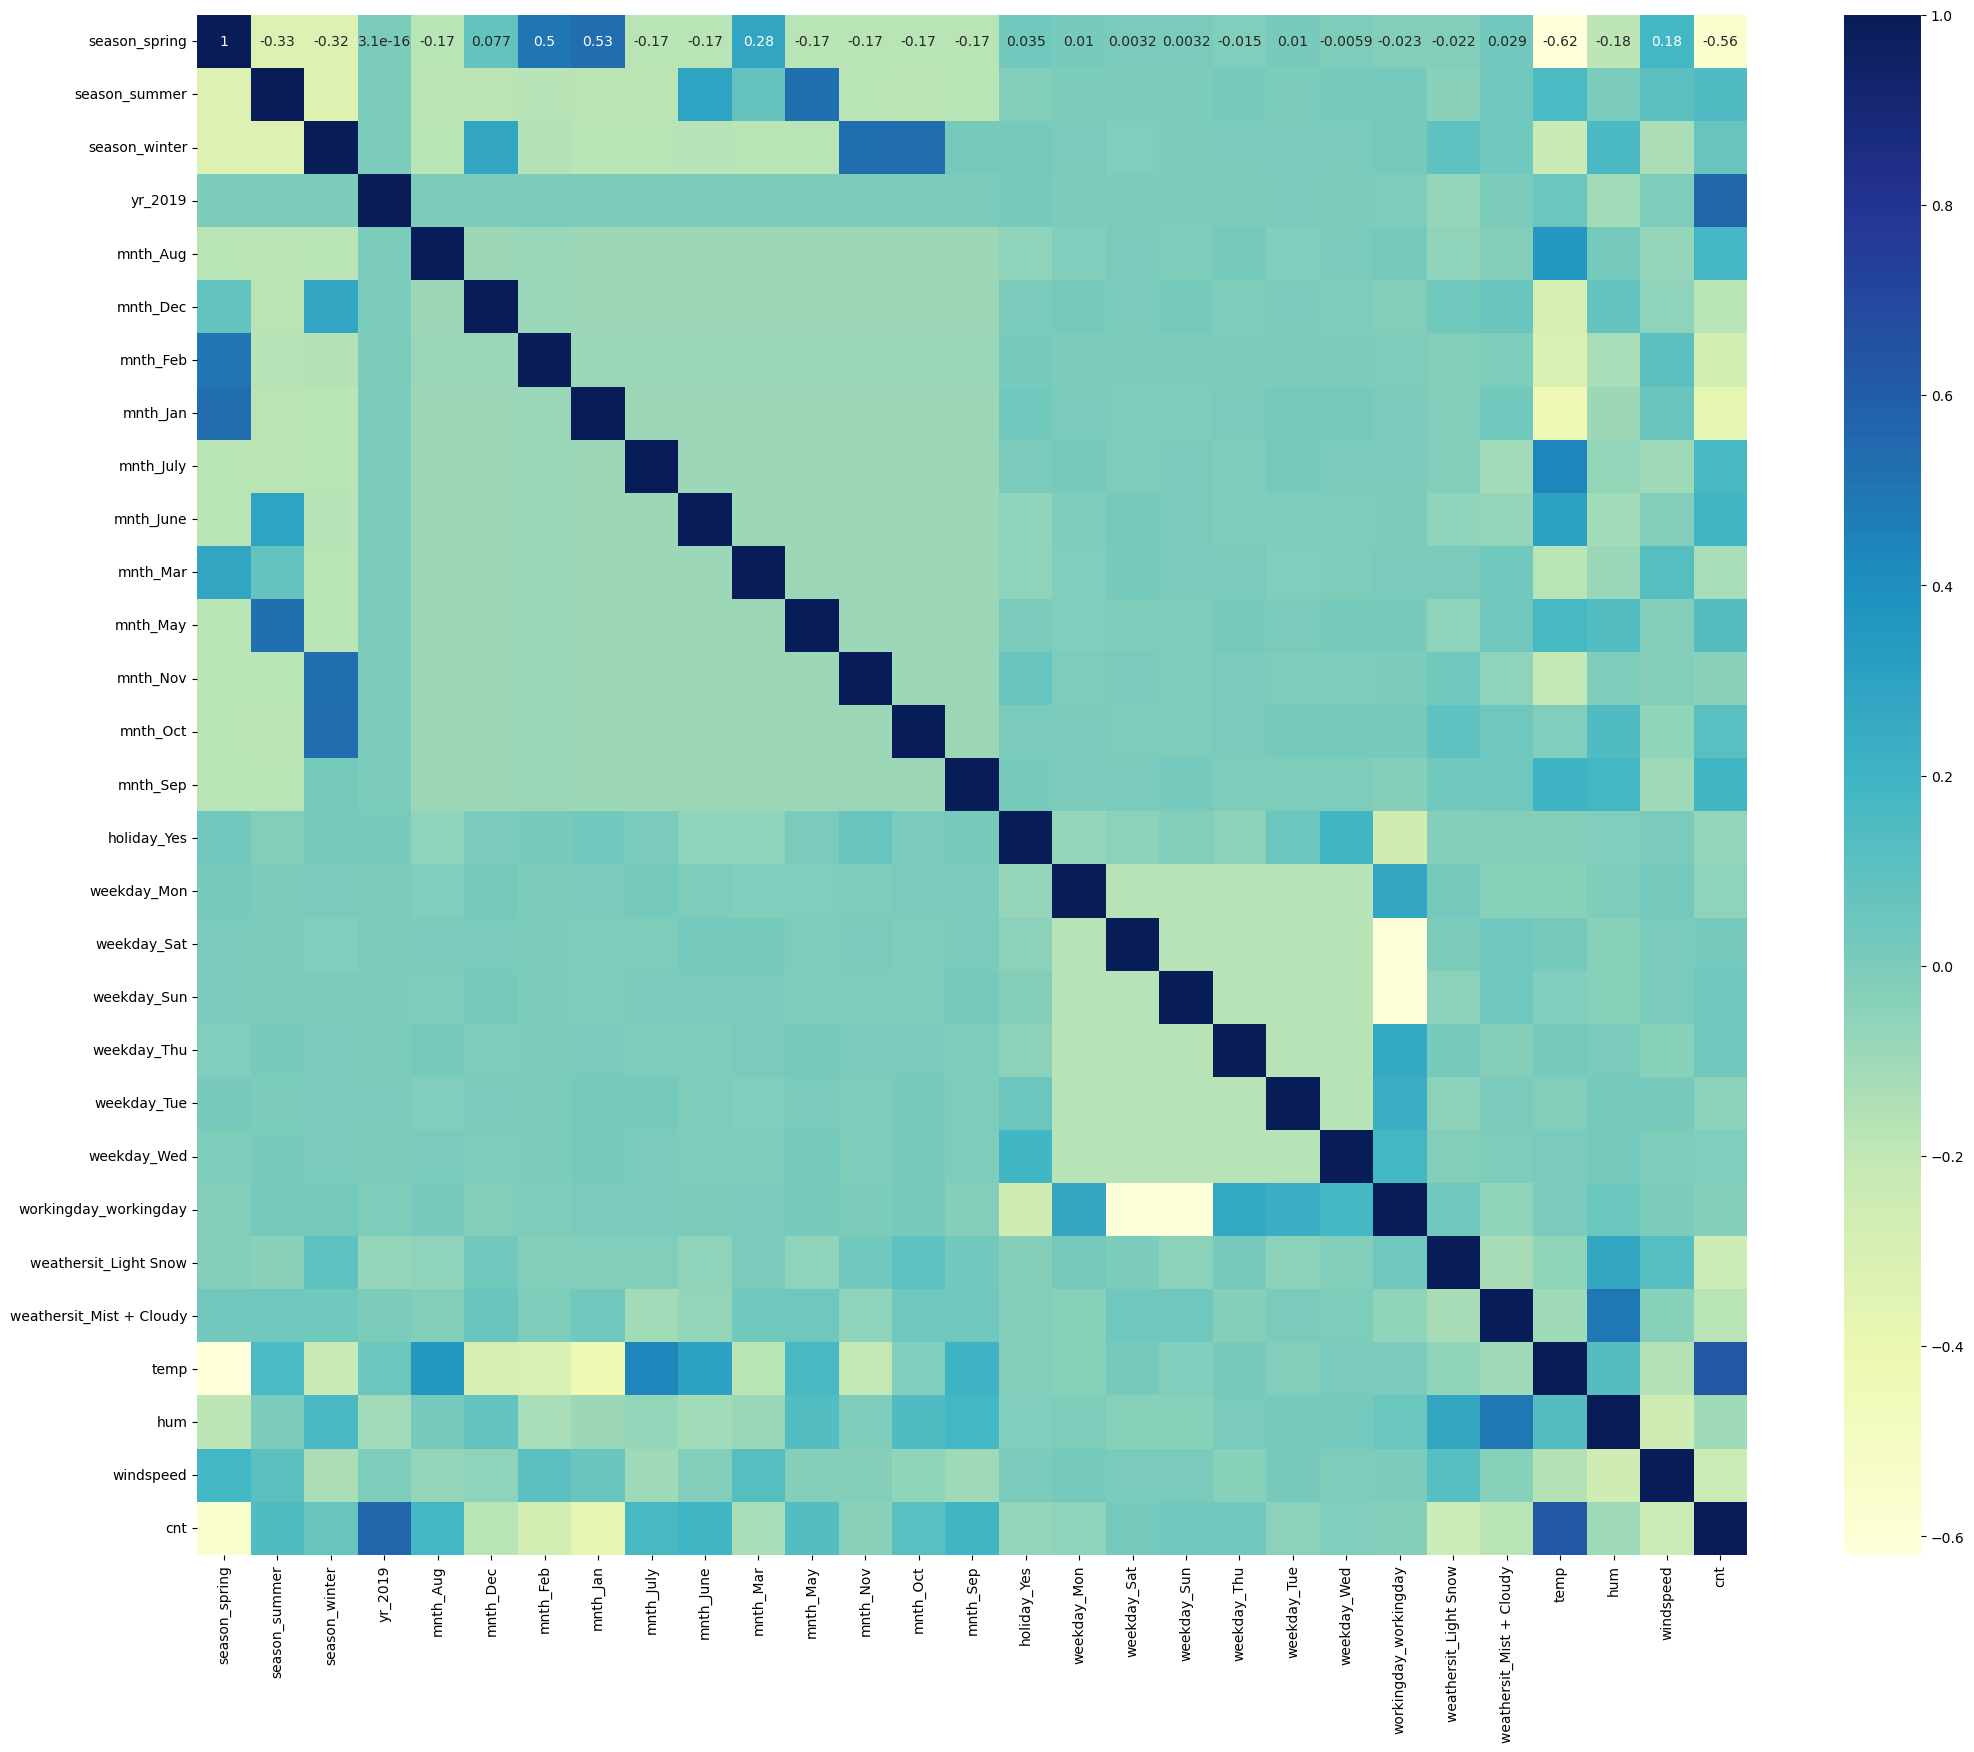

In [26]:
#Now lets check the correlation between variables again
plt.figure(figsize=(25, 20))
sns.heatmap(b_day.corr(), cmap='YlGnBu', annot = True)
plt.show()

- Temperature, summer season, and the months from June to October are highly correlated with the count variable and appear to significantly influence the number of bike rentals.

## 4.Splitting the Data into Training and Testing Sets.
- Now let's start with spliting the data into train and test sets along with that we will see scaling the features.

In [27]:
from sklearn.model_selection import train_test_split
b_day_train, b_day_test = train_test_split(b_day, train_size = 0.7, random_state = 100)
# We specify this to ensure that the train and test datasets consistently have the same rows.

In [28]:
#Rows and columns after split
print(b_day_train.shape)
print(b_day_test.shape)

(510, 29)
(220, 29)


**Rescaling the Features**
- To make the model easily interpretable, it is important to have all variables on the same scale. We can use standardization or normalization to ensure that the units of the coefficients are all on the same scale.

  **There are two common methods of rescaling:**

    - Min-Max scaling (Normalization): Between 0 and 1.
    - Standardization: Mean of 0, standard deviation of 1.

**Here, Min - Max Scaling is used for scaling the data.**

In [29]:
# Let's import necessary library 
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Let's Instantiate an object
scale = MinMaxScaler()

In [31]:
# Let's Create a list of numeric variables
numeric_vars=['temp','hum','windspeed','cnt']

In [32]:
# Let's Fit on data
b_day_train[numeric_vars] = scale.fit_transform(b_day_train[numeric_vars])
b_day_train.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Snow,weathersit_Mist + Cloudy,temp,hum,windspeed,cnt
576,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.815169,0.725633,0.264686,0.827658
426,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.442393,0.640189,0.255342,0.465255
728,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.395666,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [33]:
# Let's Check numeric variables(min and max) after scaling
b_day_train.describe()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Snow,weathersit_Mist + Cloudy,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.025490,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.711765,0.029412,0.345098,0.537440,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.157763,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.453386,0.169124,0.475867,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- All the numeric variables are now mapped between 0 and 1
- Multicollinearity assumes that predictors are not correlated with each other. If there is correlation among predictors, it can lead to unreliable estimates of the coefficients, making the model difficult to interpret and potentially reducing its predictive power.

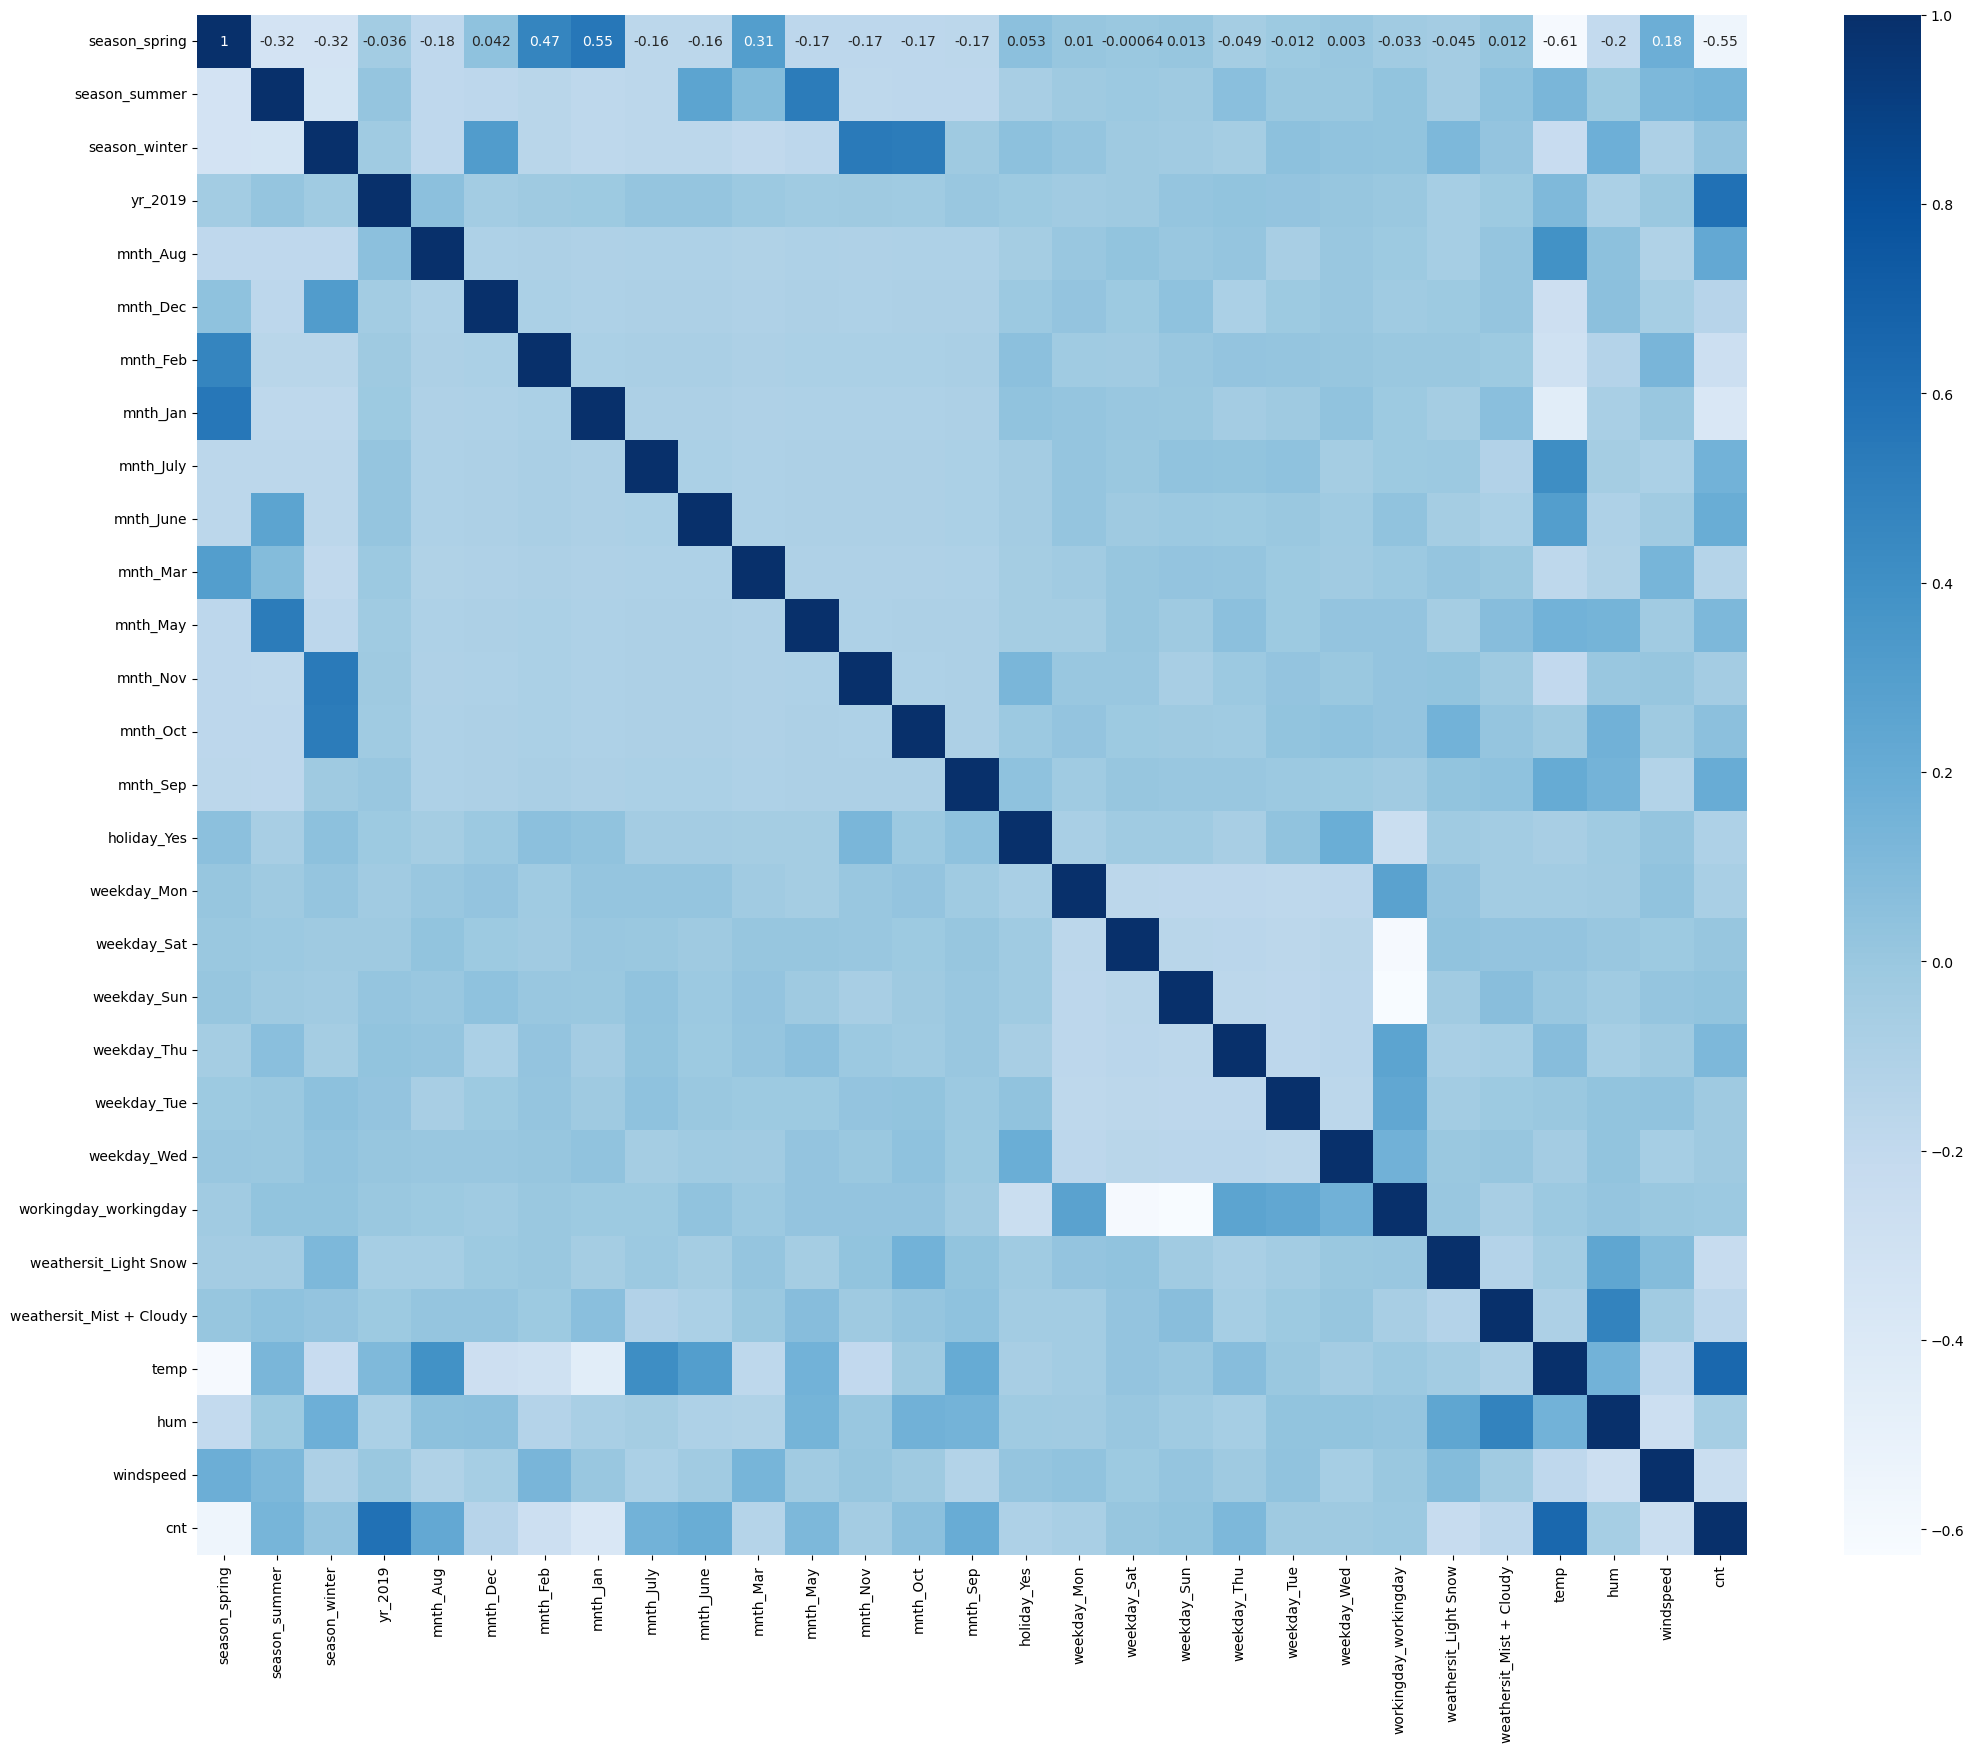

In [34]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling

fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(b_day_train.corr(), cmap='Blues', annot=True, ax=ax)
plt.show()

- The heatmap indicates that temperature and year have a correlation with the count variable. Additionally, it shows that the number of bike rentals tends to be slightly higher in August and September. This suggests that both seasonal temperature variations and specific months influence rental patterns.

**Let's Divide into X and Y sets for the model building**

In [35]:
# Divide the data into X and y
y_b_day_train = b_day_train.pop('cnt')
X_b_day_train = b_day_train

## 5. Building a linear model.

- We will use the LinearRegression function from SciKit-Learn because it is compatible with Recursive Feature Elimination (RFE), a utility from sklearn. This allows us to efficiently select the most important features for our model, improving its performance and interpretability. By combining LinearRegression and RFE, we can build a more robust and accurate predictive model.

**Lets's start with RFE (Recursive Feature Elimination)**

In [36]:
# Let's Import RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# let's Run RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_b_day_train, y_b_day_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_b_day_train, y_b_day_train)

In [38]:
# List of variables selected
list(zip(X_b_day_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 11),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 6),
 ('weekday_Wed', False, 10),
 ('workingday_workingday', False, 3),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [39]:
# Columns where RFE support is True
col = X_b_day_train.columns[rfe.support_]
col

Index(['season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep',
       'holiday_Yes', 'weathersit_Light Snow', 'weathersit_Mist + Cloudy',
       'temp', 'hum', 'windspeed'],
      dtype='object')

In [40]:
# Columns where RFE support is False
X_b_day_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Feb', 'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday_workingday'],
      dtype='object')

**Building model using statsmodel**

In [41]:
# Let's Creat X_test dataframe with RFE selected variables
X_b_day_train_rfe = X_b_day_train[col]

In [42]:
# Let's Add a constant variable 
import statsmodels.api as sm  
X_b_day_train_rfe = sm.add_constant(X_b_day_train_rfe)

In [43]:
# Let's Run the linear model 
lm = sm.OLS(y_b_day_train,X_b_day_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          8.15e-189
Time:                        21:12:37   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Checking VIF**

Variance Inflation Factor (VIF) provides a quantitative measure of the correlation between feature variables. It is crucial for testing our linear model to ensure that multicollinearity is not an issue. The formula for calculating VIF is:

$$
\text{VIF}_i = \frac{1}{1 - R_i^2}
$$

where \( R_i^2 \) is the coefficient of determination of the regression of the \( i \)-th feature on all other features.


In [44]:
# Let's Drop the constant term 
X_b_day_train_rfe = X_b_day_train_rfe.drop(['const'], axis=1)

In [45]:
# Now let's Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_b_day_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,30.89
12,temp,17.79
14,windspeed,4.72
0,season_spring,4.37
2,season_winter,4.06
1,season_summer,2.82
11,weathersit_Mist + Cloudy,2.32
3,yr_2019,2.09
7,mnth_Nov,1.85
5,mnth_Jan,1.75


- Humidity can be dropped due to its high VIF value(30.89), indicating it is insignificant in the presence of other variables. So Humidity can droped.

In [46]:
#Drop Humidity
X_b_day_train_new1 = X_b_day_train_rfe.drop(["hum"], axis = 1)

- Let's Rebuild the model without Humidity.

In [47]:
# Build a model 1
X_b_day_train_lm1 = sm.add_constant(X_b_day_train_new1)
lm1 = sm.OLS(y_b_day_train,X_b_day_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          4.75e-186
Time:                        21:12:37   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [48]:
# Let's Drop constant.
X_b_day_train_lm1= X_b_day_train_lm1.drop(['const'], axis=1)

In [49]:
# Let's Calculate the VIFs for the model 1.
vif = pd.DataFrame()
X = X_b_day_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,5.17
13,windspeed,4.67
2,season_winter,2.95
0,season_spring,2.89
1,season_summer,2.24
3,yr_2019,2.07
7,mnth_Nov,1.81
5,mnth_Jan,1.66
6,mnth_July,1.59
11,weathersit_Mist + Cloudy,1.57


- Temperature can be dropped due to its high VIF value(5.17), indicating it is insignificant in the presence of other variables. So Temperature can droped.

In [50]:
X_b_day_train_new2 = X_b_day_train_lm1.drop(["temp"], axis = 1)

- Let's Rebuild the model without Temperature.

In [51]:
# Build a model 2
X_b_day_train_lm2 = sm.add_constant(X_b_day_train_new2)
lm2 = sm.OLS(y_b_day_train,X_b_day_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.9
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.82e-159
Time:                        21:12:37   Log-Likelihood:                 438.84
No. Observations:                 510   AIC:                            -849.7
Df Residuals:                     496   BIC:                            -790.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [52]:
# Let's Drop constant.
X_b_day_train_lm2= X_b_day_train_lm2.drop(['const'], axis=1)

In [53]:
# Let's Calculate the VIFs for the model 2.
vif = pd.DataFrame()
X = X_b_day_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,windspeed,3.89
0,season_spring,2.89
2,season_winter,2.85
1,season_summer,2.02
3,yr_2019,1.83
7,mnth_Nov,1.80
5,mnth_Jan,1.64
11,weathersit_Mist + Cloudy,1.53
4,mnth_Dec,1.46
6,mnth_July,1.20


Finally, we have our model! Both the VIFs and p-values are within acceptable ranges, so we can proceed with predictions using this model.

- The p-value for each term tests the null hypothesis that the coefficient is zero (indicating no effect). A p-value below 0.05 suggests that we can reject the null hypothesis, meaning the term significantly contributes to the model.

- Typically, a VIF value greater than 10 indicates high multicollinearity. Since our VIF values are all below 5, multicollinearity is not a concern, and we can confidently use our regression model.

- R-squared measures how well the model explains the variability of the dependent variable, with values ranging from 0 to 100%. Our model has an R-squared value of 0.792 (79.2%), indicating a strong relationship between the model and the dependent variable.

- The adjusted R-squared, which accounts for the number of predictors in the model, is approximately 0.786 (78.6%), further validating the model’s effectiveness.

Thus, our final model, lm2, is derived by excluding Humidity and Temperature from the RFE support columns.

## 6. Residual Analysis, Predictions and Model Evaluation.

- ## Residual Analysis.

In [54]:
# Let's checck the assumpitions of Linear Regression.
X_b_day_train_lm2

,season_spring,season_summer,season_winter,yr_2019,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,holiday_Yes,weathersit_Light Snow,weathersit_Mist + Cloudy,windspeed
576,0,0,0,1,0,0,1,0,0,0,0,0,0.264686
426,1,0,0,1,0,0,0,0,0,0,0,1,0.255342
728,1,0,0,1,1,0,0,0,0,0,0,0,0.663106
482,0,1,0,1,0,0,0,0,0,0,0,1,0.188475
111,0,1,0,0,0,0,0,0,0,0,0,1,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,1,0,0,0,0,0,0,0,0,0.187140
53,1,0,0,0,0,0,0,0,0,0,0,0,0.111379
350,0,0,1,0,1,0,0,0,0,0,0,1,0.431816
79,0,1,0,0,0,0,0,0,0,0,0,1,0.529881


In [55]:
# Let's predict y train.
X_b_day_train_lm2 = sm.add_constant(X_b_day_train_lm2, has_constant='add')
y_b_day_train_pred = lm2.predict(X_b_day_train_lm2)

In [56]:
# Let's Import the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

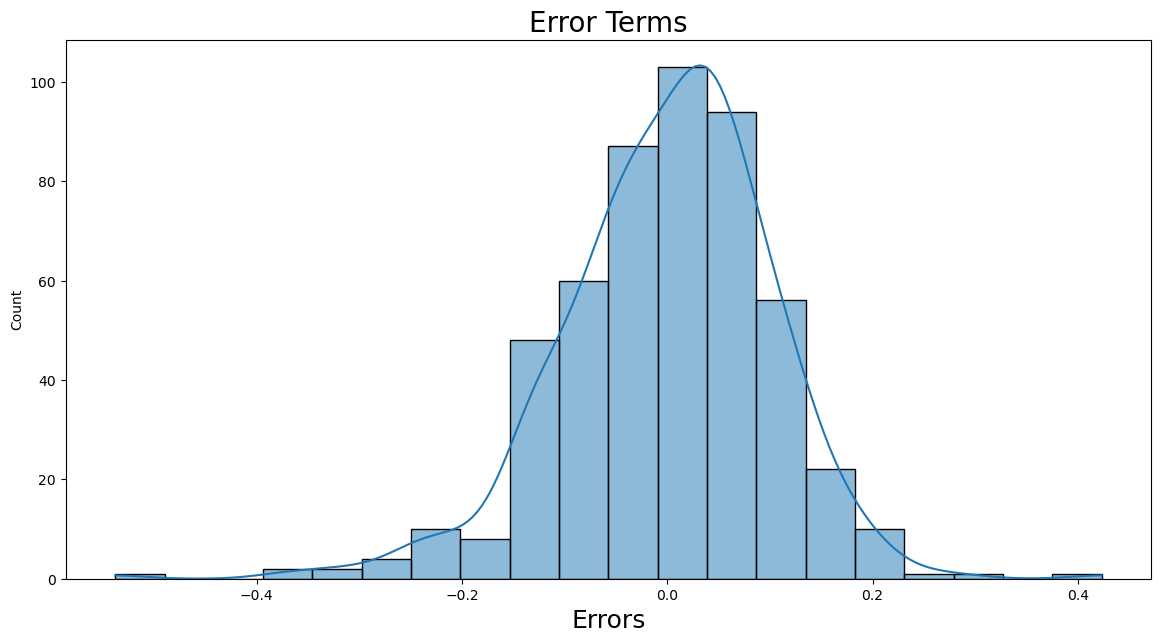

In [57]:
# Lets's Plot the histogram of the error terms

# Create a figure and set its size
plt.figure(figsize=(14, 7))

# Plot the distribution of error terms
sns.histplot((y_b_day_train - y_b_day_train_pred), bins=20, kde=True)

# Set the title and labels
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

# Show the plot
plt.show()

- We can see Error terms are normally distributed

- ## Predictions.

In [58]:
# Let's Create a list of numeric variables

numeric_vars=['temp','hum','windspeed','cnt']

#Fit on data
b_day_test[numeric_vars] = scale.transform(b_day_test[numeric_vars])
b_day_test.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Snow,weathersit_Mist + Cloudy,temp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0.831783,0.657364,0.084219,0.692706
535,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.901354,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0.511964,0.837699,0.334206,0.303382
221,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.881625,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [59]:
# Let's Divide into X_b_day_test and y_b_day_test
y_b_day_test = b_day_test.pop('cnt')
X_b_day_test = b_day_test
X_b_day_test.describe()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Snow,weathersit_Mist + Cloudy,temp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.481818,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.036364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.640909,0.027273,0.318182,0.558718,0.638221,0.313293
std,0.436599,0.441609,0.425817,0.500809,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.187620,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.480828,0.163248,0.466833,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.558172,0.625590,0.300126
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [60]:
#Columns
X_b_day_train_new2.columns

Index(['season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov', 'mnth_Sep',
       'holiday_Yes', 'weathersit_Light Snow', 'weathersit_Mist + Cloudy',
       'windspeed'],
      dtype='object')

In [61]:
# Now let's use our model to make predictions.
# Let's Creating X_b_day_test_new dataframe by dropping variables from X_b_day
X_b_day_test_new = X_b_day_test[X_b_day_train_new2.columns]

# Adding a constant variable 
X_b_day_test_new1 = sm.add_constant(X_b_day_test_new)
X_b_day_test_new1.head()

,const,season_spring,season_summer,season_winter,yr_2019,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,holiday_Yes,weathersit_Light Snow,weathersit_Mist + Cloudy,windspeed
184,1.0,0,0,0,0,0,0,1,0,0,1,0,1,0.084219
535,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0.153728
299,1.0,0,0,1,0,0,0,0,0,0,0,0,1,0.334206
221,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0.339570
152,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0.537414


In [62]:
# Making predictions
y_b_day_pred = lm2.predict(X_b_day_test_new1)

**Finding R-squared and Adjusted R-Squared for Test set**

In [63]:
# Let's Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_b_day_test,y_b_day_pred)

0.7779806740725195

In [64]:
#Adjusted R^2

Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


- ## Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

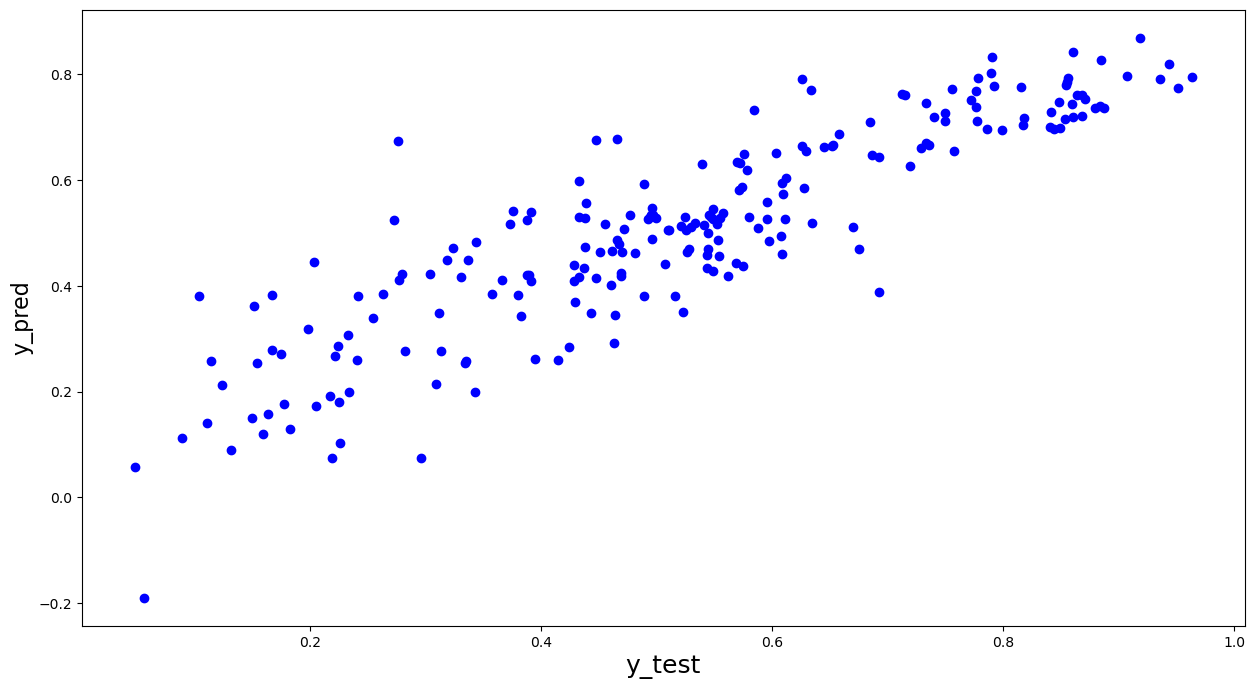

In [65]:
# Let's Plot y_b_day_test and y_b_day_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_b_day_test,y_b_day_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

- Let's Visualising the fit on the test set

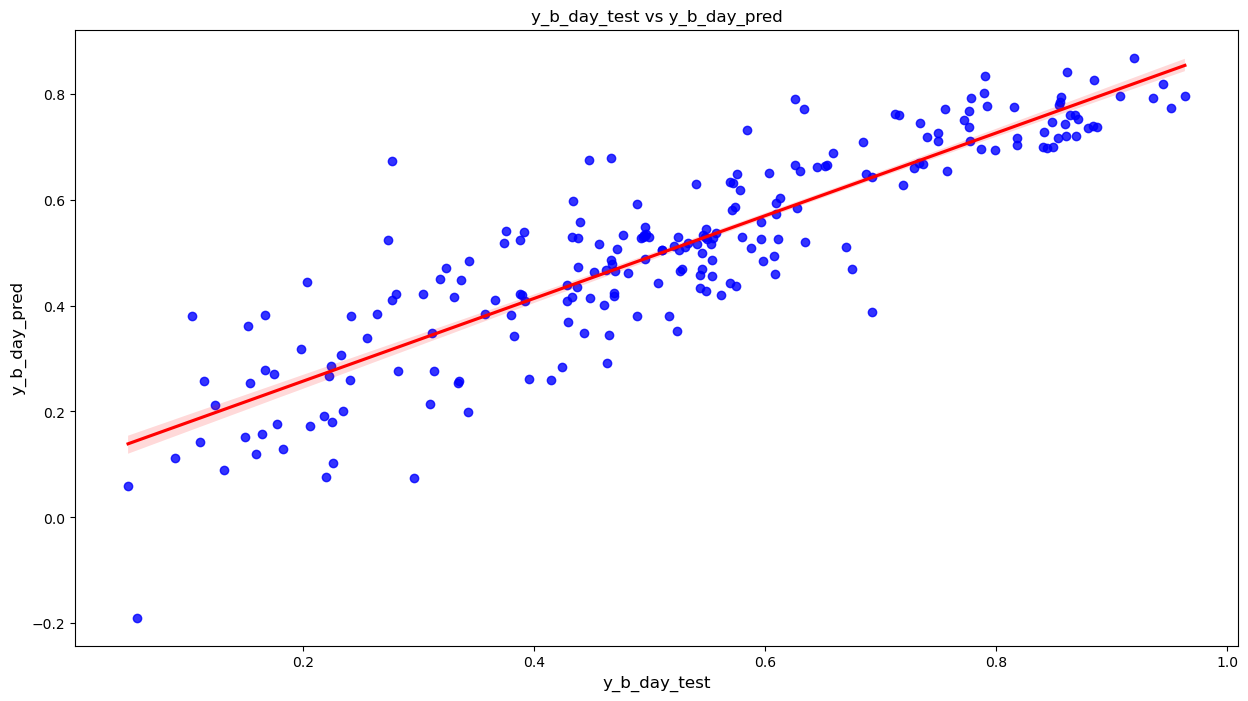

In [66]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_b_day_test, y=y_b_day_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_b_day_test vs y_b_day_pred', fontsize=12)              # Plot heading 
plt.xlabel('y_b_day_test', fontsize=12)                          # X-label
plt.ylabel('y_b_day_pred', fontsize=12)                          # Y-label
plt.show()

We can see that the equation of our best fitted line is:

$ count=         0.4914 \times temp+   0.0916   \times September + 0.0645 \times Saturday +0.0527 \times summer + 0.0970 \times winter + 0.2334 \times Year + 0.0566 \times working day   - 0.03041 \times light snow - 0.0786 \times mist cloudy -0.065 \times spring $

- Comparison of Train and Test Model Analysis:
  
      - Train  - R^2 :  0.796.
      - Train  - Adjusted R^2 : 0.7.
      - Test  - R^2: 0.77.
      - Test -  Adjusted R^2:0.790564.
      - Difference in R^2 between train and test:1.5%.
      - Difference in adjusted R^2 between Train and test:3.15%.

Since adusted R^2 is less than which is less than 5% difference in R62, we can conclude that it is the best model.

- Analysis on the problem:
  - The temperature variable has the highest coefficient at 0.4914, indicating that if the temperature increases by one unit, the number of bike rentals increases by 0.4914 units.
  - Some variables have negative coefficients. A negative coefficient indicates that as the independent variable increases, the dependent variable tends to decrease.
  - Specifically, the spring, misty/cloudy, and light snow variables have negative coefficients. The coefficient value represents how much the dependent variable changes for a one-unit shift in the independent variable while keeping other variables in the model constant.